In [7]:
# Import library yang diperlukan
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
iris = load_iris()
X, y = iris.data, iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Menampilkan data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# Pembersihan Data
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [9]:
# Transformasi Data
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mengembalikan scaled data ke DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)
print("\nScaled DataFrame:\n", df_scaled.head())


Scaled DataFrame:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


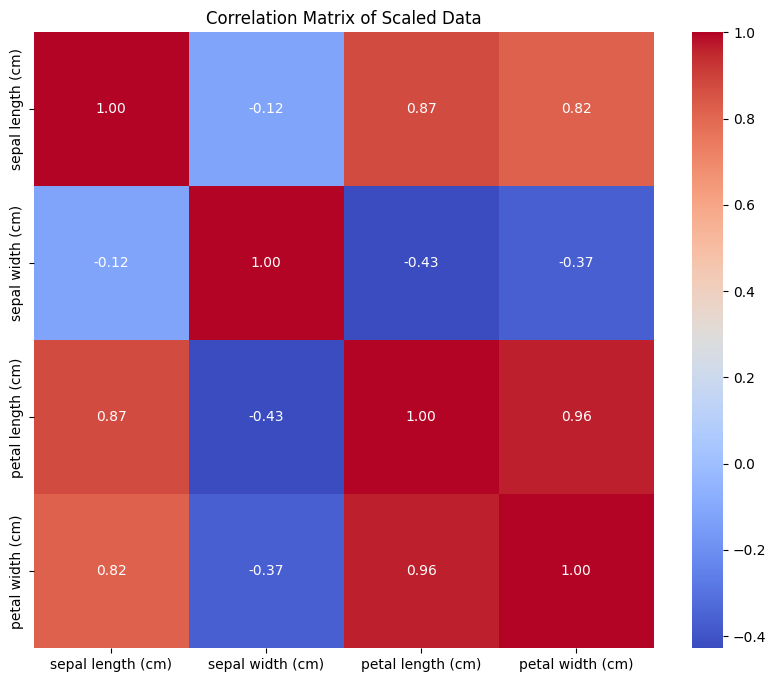

In [10]:
# Membuat correlation matrix dari data yang telah di standarisasi
corr_matrix = df_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Scaled Data')
plt.show()

In [11]:
# Seleksi Fitur
# Using ANOVA F-test to select top 2 features
selector = SelectKBest(f_classif, k=2)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = df.columns[selector.get_support(indices=True)]
print("\nSelected Features:", selected_features)


Selected Features: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


In [ ]:
# Mengembalikan seleksi fitur ke DataFrame
df_selected = pd.DataFrame(X_selected, columns=selected_features)
print("\nSelected Features DataFrame:\n", df_selected.head())


Selected Features DataFrame:
    petal length (cm)  petal width (cm)
0          -1.340227         -1.315444
1          -1.340227         -1.315444
2          -1.397064         -1.315444
3          -1.283389         -1.315444
4          -1.340227         -1.315444


In [ ]:
# Reduksi Data
# Applying PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)
print("\nShape of X after PCA:", X_pca.shape)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Shape of X after PCA: (150, 2)
Explained Variance Ratio: [0.98143272 0.01856728]


In [ ]:
# Mengembalikan hasil PCA ke DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
print("\nFirst 5 rows after PCA:\n", df_pca.head())


First 5 rows after PCA:
        PCA1      PCA2
0 -1.877843  0.017524
1 -1.877843  0.017524
2 -1.918033  0.057714
3 -1.837653 -0.022666
4 -1.877843  0.017524


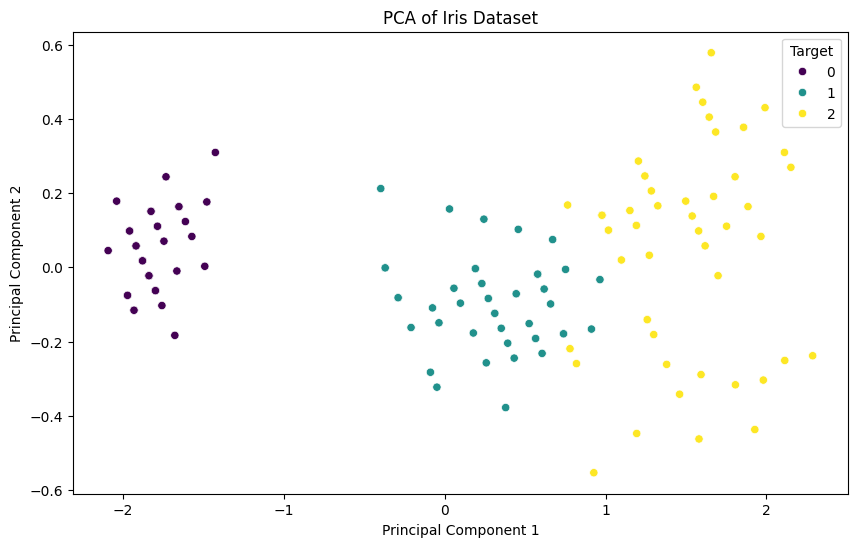

In [ ]:
# Menggabungkan hasil PCA dengan target untuk plotting
df_pca['target'] = y

# Plotting the PCA reduced data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='target', data=df_pca, palette='viridis')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.show()
